Find the missing files in YOLOv8

In [ ]:
import os

image_folder = 'path_to_your_images'
label_folder = 'path_to_your_labels'

# Get all image and label filenames
image_files = set(f.split('.')[0] for f in os.listdir(image_folder) if f.endswith('.jpg'))
label_files = set(f.split('.')[0] for f in os.listdir(label_folder) if f.endswith('.txt'))

# Find missing labels
missing_labels = image_files - label_files
for missing in missing_labels:
    open(os.path.join(label_folder, f"{missing}.txt"), 'w').close()  # Create an empty .txt file

# Optionally, print out images without labels or extra labels
print("Missing Labels:", missing_labels)


For a file

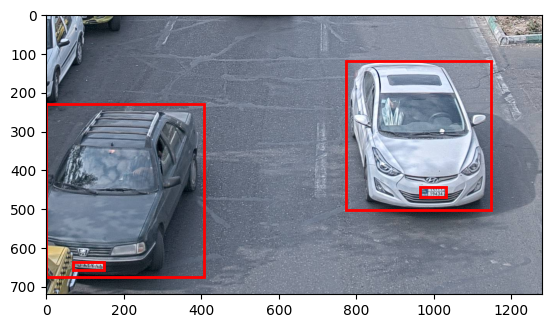

In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


def convert_xml_to_yolo(xml_file, image_file, class_map):
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Open the image to get its dimensions
    image = Image.open(image_file)
    image_width, image_height = image.size

    # Create the .txt file to write YOLO annotations
    txt_file = xml_file.replace('.xml', '.txt')
    with open(txt_file, 'w') as f:
        # Process each object in the XML
        for obj in root.findall('objs'):
            # Extract object information
            class_name = obj.find('name').text
            class_id = class_map.get(class_name, -1)  # Get the class ID, -1 if not found

            if class_id == -1:
                continue  # Skip if the class is not found in the map

            # Get the bounding box coordinates
            xmin = float(obj.find('bndbox/xmin').text)
            ymin = float(obj.find('bndbox/ymin').text)
            xmax = float(obj.find('bndbox/xmax').text)
            ymax = float(obj.find('bndbox/ymax').text)

            # Normalize the coordinates
            center_x = (xmin + xmax) / 2.0 / image_width
            center_y = (ymin + ymax) / 2.0 / image_height
            width = (xmax - xmin) / image_width
            height = (ymax - ymin) / image_height

            # Write to the .txt file in YOLO format
            f.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

    return txt_file


def plot_bounding_boxes_from_txt(image_file, txt_file, class_map):
    # Open the image to get its dimensions
    image = Image.open(image_file)
    image_width, image_height = image.size

    # Create a plot
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Read the YOLO annotations from the .txt file
    with open(txt_file, 'r') as f:
        lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            center_x = float(parts[1])
            center_y = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # Reverse the normalization to get the original bounding box coordinates
            xmin = (center_x - width / 2.0) * image_width
            ymin = (center_y - height / 2.0) * image_height
            xmax = (center_x + width / 2.0) * image_width
            ymax = (center_y + height / 2.0) * image_height

            # Plot the bounding box
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

    # Show the plot with bounding boxes
    plt.show()


# Define the class map (class name to class ID)
class_map = {
    'PlateFreeZone': 0,
    'Car': 1,
    'Plate': 2
}

# Define the paths to your XML and image files
xml_file = '/content/i_140008071208279_19@094@24_2001.xml'
image_file = '/content/i_140008071208279_19@094@24_2001.jpg'
# Step 1: Convert XML to YOLO format
txt_file = convert_xml_to_yolo(xml_file, image_file, class_map)

# Step 2: Plot bounding boxes from the YOLO .txt file
plot_bounding_boxes_from_txt(image_file, txt_file, class_map)


For folders of xml and jpg files

In [ ]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


def convert_xml_to_yolo(xml_file, image_file, class_map):
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Open the image to get its dimensions
    image = Image.open(image_file)
    image_width, image_height = image.size

    # Create the .txt file to write YOLO annotations
    txt_file = xml_file.replace('.xml', '.txt')
    with open(txt_file, 'w') as f:
        # Process each object in the XML
        for obj in root.findall('objs'):
            # Extract object information
            class_name = obj.find('name').text
            class_id = class_map.get(class_name, -1)  # Get the class ID, -1 if not found

            if class_id == -1:
                continue  # Skip if the class is not found in the map

            # Get the bounding box coordinates
            xmin = float(obj.find('bndbox/xmin').text)
            ymin = float(obj.find('bndbox/ymin').text)
            xmax = float(obj.find('bndbox/xmax').text)
            ymax = float(obj.find('bndbox/ymax').text)

            # Normalize the coordinates
            center_x = (xmin + xmax) / 2.0 / image_width
            center_y = (ymin + ymax) / 2.0 / image_height
            width = (xmax - xmin) / image_width
            height = (ymax - ymin) / image_height

            # Write to the .txt file in YOLO format
            f.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

    return txt_file


def plot_bounding_boxes_from_txt(image_file, txt_file, class_map):
    # Open the image to get its dimensions
    image = Image.open(image_file)
    image_width, image_height = image.size

    # Create a plot
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Read the YOLO annotations from the .txt file
    with open(txt_file, 'r') as f:
        lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            center_x = float(parts[1])
            center_y = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # Reverse the normalization to get the original bounding box coordinates
            xmin = (center_x - width / 2.0) * image_width
            ymin = (center_y - height / 2.0) * image_height
            xmax = (center_x + width / 2.0) * image_width
            ymax = (center_y + height / 2.0) * image_height

            # Plot the bounding box
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

    # Show the plot with bounding boxes
    plt.show()


def process_folder(xml_folder, img_folder, class_map):
    # Iterate over all XML files in the XML folder
    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            # Construct full file paths
            xml_file_path = os.path.join(xml_folder, xml_file)
            image_file_path = os.path.join(img_folder, xml_file.replace('.xml', '.jpg'))

            if os.path.exists(image_file_path):  # Ensure the corresponding image exists
                # Convert XML to YOLO .txt format
                txt_file = convert_xml_to_yolo(xml_file_path, image_file_path, class_map)

                # Plot bounding boxes from the YOLO .txt file
                plot_bounding_boxes_from_txt(image_file_path, txt_file, class_map)
            else:
                print(f"Warning: Image file for {xml_file} not found.")


# Define the class map (class name to class ID)
class_map = {
    'PlateFreeZone': 0,
    'Car': 1,
    'Plate': 2
}

# Define the paths to your XML and image folders
xml_folder = 'path_to_your_xml_folder'  # Folder containing XML files
img_folder = 'path_to_your_image_folder'  # Folder containing image files (JPGs)

# Step 1: Process all files in the folder
process_folder(xml_folder, img_folder, class_map)

NotADirectoryError: [Errno 20] Not a directory: '/content/i_140008071208279_19@094@24_2001.xml'

**This is for plates**

In [ ]:
import xml.etree.ElementTree as ET

# Define a dictionary that maps class names to IDs (can be based on your previous 'item' list)
class_dict = {
    '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '0': 10,
    'ALEF': 11, 'BE': 12, 'PE': 13, 'TE': 14, 'SE': 15, 'JIM': 16, 'DAL': 17, 'ZHE': 18,
    'SIN': 19, 'SAD': 20, 'TA': 21, 'EIN': 22, 'GHAF': 23, 'LAM': 24, 'MIM': 25, 'NON': 26,
    'VAV': 27, 'HEH': 28, 'YE': 29, 'D': 30, 'S': 31
}

def convert_xml_to_txt(xml_file, output_txt_file):
    # Parse the XML
    tree = ET.parse(xml_file)
    root = tree.getroot()

    with open(output_txt_file, 'w') as f:
        # Loop through each object in the XML file
        for obj in root.findall('object'):
            # Extract the class name (label) and the bounding box coordinates
            name = obj.find('name').text
            xmin = float(obj.find('bndbox/xmin').text)
            ymin = float(obj.find('bndbox/ymin').text)
            xmax = float(obj.find('bndbox/xmax').text)
            ymax = float(obj.find('bndbox/ymax').text)

            # Get the class id based on the name (from the class_dict)
            class_id = class_dict.get(name, -1)  # -1 if class name is not in the dictionary

            if class_id != -1:
                # Write the output in the format: class_id xmin ymin xmax ymax
                f.write(f"{class_id} {xmin} {ymin} {xmax} {ymax}\n")

# Usage:
convert_xml_to_txt('path/to/your/annotation.xml', 'output.txt')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os

# مسیر پوشه‌ها
image_folder = "/content/drive/MyDrive/All Images Car"  # پوشه تصاویر
xml_folder = "/content/drive/MyDrive/All Annots Car"      # پوشه XML‌ها

# بررسی فایل‌های میسینگ و حذف آن‌ها
def delete_missing_files():
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]

    # فایل‌های میسینگ XML برای تصاویر
    missing_xmls = [img for img in image_files if img.replace('.jpg', '.xml') not in xml_files]
    missing_images = [xml for xml in xml_files if xml.replace('.xml', '.jpg') not in image_files]

    # پاک کردن فایل‌های میسینگ
    for file in missing_xmls:
        os.remove(os.path.join(image_folder, file))
        print(f"Deleted missing image: {file}")

    for file in missing_images:
        os.remove(os.path.join(xml_folder, file))
        print(f"Deleted missing XML: {file}")

# اجرای کد
delete_missing_files()


Deleted missing image: m%20-000331264-08-76272-BEH-74-078-076-003-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000339944-08-68847-SIN-74-157-077-002-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000330984-08-25594-JIM-22-062-081-002-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000335908-08-64411-SIN-74-078-068-003-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000337904-08-88374-LAAM-12-061-078-002-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000333184-08-92723-VAV-42-077-085-003-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000340584-08-63887-SAAD-73-075-071-003-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000327144-08-65791-SIN-22-083-075-003-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000337788-08-28471-JIM-12-084-075-002-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000339948-08-18928-DAL-74-063-076-002-100-000-3Ywx-1 (1).jpg
Deleted missing image: m%20-000329304-08-93921-DAL-74-072-071-002-100-000-3Ywx-1 (1).jpg
Deleted missing ima

In [9]:
import os

# مسیر پوشه‌ها
image_folder = "/content/drive/MyDrive/All Images Car"  # پوشه تصاویر
xml_folder = "/content/drive/MyDrive/All Annots Car"      # پوشه XML‌ها

# شمارش فایل‌های .jpg و .xml و بررسی هماهنگی
def check_files():
    # دریافت لیست فایل‌های .jpg و .xml
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]

    # بررسی هماهنگی فایل‌ها (یعنی هر .jpg باید یک .xml داشته باشد)
    missing_xmls = [img for img in image_files if img.replace('.jpg', '.xml') not in xml_files]
    missing_images = [xml for xml in xml_files if xml.replace('.xml', '.jpg') not in image_files]

    # نتایج شمارش
    print(f"Total .jpg files: {len(image_files)}")
    print(f"Total .xml files: {len(xml_files)}")
    print(f"Missing XML files for the following images: {missing_xmls}")
    print(f"Missing image files for the following XMLs: {missing_images}")
    print(f"Matching files: {len(image_files) - len(missing_xmls)} images with XMLs")

# اجرای کد
check_files()


Total .jpg files: 8311
Total .xml files: 8311
Missing XML files for the following images: []
Missing image files for the following XMLs: []
Matching files: 8311 images with XMLs


In [11]:
import os

# مسیر پوشه‌ها
image_folder = "/content/drive/MyDrive/All Images Car"  # پوشه تصاویر
xml_folder = "/content/drive/MyDrive/All Annots Car"      # پوشه XML‌ها

# چک نهایی فایل‌ها
def check_all_files():
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]

    # فایل‌های میسینگ XML برای تصاویر و بالعکس
    missing_xmls = [img for img in image_files if img.replace('.jpg', '.xml') not in xml_files]
    missing_images = [xml for xml in xml_files if xml.replace('.xml', '.jpg') not in image_files]

    # بررسی اینکه هیچ فایل میسینگ وجود نداشته باشد
    if missing_xmls or missing_images:
        print("Error: Some files are missing!")
        if missing_xmls:
            print(f"Missing XMLs for these images: {missing_xmls}")
        if missing_images:
            print(f"Missing images for these XMLs: {missing_images}")
        return False

    # بررسی صحت فرمت فایل‌های XML
    for xml_file in xml_files:
        try:
            xml_path = os.path.join(xml_folder, xml_file)
            # می‌توانید کد چک صحت XML مثل خواندن فایل و بررسی محتوا اضافه کنید
            # در اینجا فقط بررسی می‌شود که فایل‌ها قابل خواندن باشند
            with open(xml_path, 'r') as file:
                content = file.read()
                if not content:
                    print(f"Error: {xml_file} is empty or corrupted.")
                    return False
        except Exception as e:
            print(f"Error reading {xml_file}: {e}")
            return False

    # همه چیز صحیح است
    print("All files are properly aligned and ready to use.")
    return True

# اجرای چک نهایی
if check_all_files():
    print("Everything is correct, no issues found.")
else:
    print("There are some issues with the files.")


All files are properly aligned and ready to use.
Everything is correct, no issues found.


In [12]:
import os
import xml.etree.ElementTree as ET

# Folder Paths
image_folder = "/content/drive/MyDrive/All Images Car"  # پوشه تصاویر
xml_folder = "/content/drive/MyDrive/All Annots Car"      # پوشه XML‌ها
output_folder = "/content/drive/MyDrive/yolo_labels"  # پوشه خروجی برای فایل‌های تکستی

# Categories
class_names = {"Car": 0, "Plate": 1, "PlateFreeZone": 2}  # معادل‌سازی نام کلاس‌ها به شماره‌ها

# YOLOv8 turn them and normalize
def convert_to_yolo_format(image_width, image_height, xmin, ymin, xmax, ymax):
    x_center = (xmin + xmax) / 2.0
    y_center = (ymin + ymax) / 2.0
    width = xmax - xmin
    height = ymax - ymin

    # normalize to the dimensions of pictures
    x_center /= image_width
    y_center /= image_height
    width /= image_width
    height /= image_height

    return x_center, y_center, width, height

# XML read and process
def process_xml(xml_path, image_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    image_width = int(root.find(".//size//width").text)
    image_height = int(root.find(".//size//height").text)

    label_data = []

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name not in class_names:
            continue

        xmin = float(obj.find(".//bndbox/xmin").text)
        ymin = float(obj.find(".//bndbox/ymin").text)
        xmax = float(obj.find(".//bndbox/xmax").text)
        ymax = float(obj.find(".//bndbox/ymax").text)

        # normalize and turn to yolo
        x_center, y_center, width, height = convert_to_yolo_format(image_width, image_height, xmin, ymin, xmax, ymax)

        # save data
        label_data.append(f"{class_names[class_name]} {x_center} {y_center} {width} {height}")

    return label_data

# create txt for xmls
def create_yolo_labels():
    os.makedirs(output_folder, exist_ok=True)

    xml_files = [f for f in os.listdir(xml_folder) if f.endswith('.xml')]
    for xml_file in xml_files:
        image_name = xml_file.replace(".xml", ".jpg")  # propose names for xml and jpg are the same
        image_path = os.path.join(image_folder, image_name)
        xml_path = os.path.join(xml_folder, xml_file)

        label_data = process_xml(xml_path, image_path)
        if label_data:
            label_file = os.path.join(output_folder, xml_file.replace(".xml", ".txt"))
            with open(label_file, 'w') as f:
                f.write("\n".join(label_data))

# run
create_yolo_labels()


In [16]:
import os

# مسیر پوشه که فایل‌های .txt در آن قرار دارند
txt_dir = '/content/drive/MyDrive/yolo_labels'

# تعداد فایل‌های .txt
txt_files = [f for f in os.listdir(txt_dir) if f.endswith('.txt')]

print(f"Total .txt files: {len(txt_files)}")

Total .txt files: 8277


In [22]:
import os

# مسیر پوشه‌ها
image_folder = "/content/drive/MyDrive/All Images Car"  # پوشه تصاویر
txt_folder = "/content/drive/MyDrive/yolo_labels"      # پوشه txt

# شمارش فایل‌های .jpg و .txt و بررسی هماهنگی
def check_files():
    # دریافت لیست فایل‌های .jpg و .txt
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    txt_files = [f for f in os.listdir(txt_folder) if f.endswith('.txt')]

    # بررسی هماهنگی فایل‌ها (یعنی هر .jpg باید یک .txt داشته باشد)
    missing_txts = [img for img in image_files if img.replace('.jpg', '.txt') not in txt_files]
    missing_images = [txt for txt in txt_files if txt.replace('.txt', '.jpg') not in image_files]

    # نتایج شمارش
    print(f"Total .jpg files: {len(image_files)}")
    print(f"Total .txt files: {len(txt_files)}")
    print(f"Missing txt files for the following images: {missing_txts}")
    print(f"Missing image files for the following txts: {missing_images}")
    print(f"Matching files: {len(image_files) - len(missing_txts)} images with txts")

# اجرای کد
check_files()


Total .jpg files: 8311
Total .txt files: 8277
Missing txt files for the following images: ['image23-12-20_13-10-03-46_00014.jpg', 'image23-12-20_13-12-41-33_00027.jpg', 'image23-12-20_13-13-42-75_00021.jpg', 'image23-12-20_13-14-43-34_00037.jpg', 'image23-12-20_13-19-59-34_00059.jpg', 'image23-12-20_13-49-38-34_00136.jpg', 'image23-12-20_13-49-47-75_00133.jpg', 'image23-12-20_13-20-47-52_00063.jpg', 'image23-12-20_13-48-57-75_00129.jpg', 'image23-12-20_13-49-26-34_00135.jpg', 'image23-12-20_13-50-03-36_00139.jpg', 'image23-12-20_13-17-41-34_00047.jpg', 'image23-12-20_13-59-56-76_00182.jpg', 'image23-12-20_13-53-53-74_00153.jpg', 'image23-12-20_14-01-45-34_00023.jpg', 'image23-12-20_13-59-04-44_00010.jpg', 'image23-12-20_13-51-38-95_00142.jpg', 'image23-12-20_13-56-50-39_00001.jpg', 'image23-12-20_13-58-16-75_00174.jpg', 'image23-12-20_14-00-31-33_00017.jpg', 'image23-12-20_13-58-02-33_00005.jpg', 'image23-12-20_13-52-27-75_00146.jpg', 'image23-12-20_14-00-43-33_00018.jpg', 'image23-12-

In [24]:
import os

# مسیر پوشه‌ها
image_folder = "/content/drive/MyDrive/All Images Car"  # پوشه تصاویر
txt_folder = "/content/drive/MyDrive/yolo_labels"      # پوشه txt

# بررسی فایل‌های میسینگ و حذف آن‌ها
def delete_missing_files():
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    txt_files = [f for f in os.listdir(txt_folder) if f.endswith('.txt')]

    # فایل‌های میسینگ txt برای تصاویر
    missing_txts = [img for img in image_files if img.replace('.jpg', '.txt') not in txt_files]
    missing_images = [txt for txt in txt_files if txt.replace('.txt', '.jpg') not in image_files]

    # پاک کردن فایل‌های میسینگ
    for file in missing_txts:
        os.remove(os.path.join(image_folder, file))
        print(f"Deleted missing image: {file}")

    for file in missing_images:
        os.remove(os.path.join(txt_folder, file))
        print(f"Deleted missing txt: {file}")

# اجرای کد
delete_missing_files()


Deleted missing image: image23-12-20_13-10-03-46_00014.jpg
Deleted missing image: image23-12-20_13-12-41-33_00027.jpg
Deleted missing image: image23-12-20_13-13-42-75_00021.jpg
Deleted missing image: image23-12-20_13-14-43-34_00037.jpg
Deleted missing image: image23-12-20_13-19-59-34_00059.jpg
Deleted missing image: image23-12-20_13-49-38-34_00136.jpg
Deleted missing image: image23-12-20_13-49-47-75_00133.jpg
Deleted missing image: image23-12-20_13-20-47-52_00063.jpg
Deleted missing image: image23-12-20_13-48-57-75_00129.jpg
Deleted missing image: image23-12-20_13-49-26-34_00135.jpg
Deleted missing image: image23-12-20_13-50-03-36_00139.jpg
Deleted missing image: image23-12-20_13-17-41-34_00047.jpg
Deleted missing image: image23-12-20_13-59-56-76_00182.jpg
Deleted missing image: image23-12-20_13-53-53-74_00153.jpg
Deleted missing image: image23-12-20_14-01-45-34_00023.jpg
Deleted missing image: image23-12-20_13-59-04-44_00010.jpg
Deleted missing image: image23-12-20_13-51-38-95_00142.j

In [25]:
import os

# مسیر پوشه‌ها
image_folder = "/content/drive/MyDrive/All Images Car"  # پوشه تصاویر
txt_folder = "/content/drive/MyDrive/yolo_labels"      # پوشه txt

# شمارش فایل‌های .jpg و .txt و بررسی هماهنگی
def check_files():
    # دریافت لیست فایل‌های .jpg و .txt
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    txt_files = [f for f in os.listdir(txt_folder) if f.endswith('.txt')]

    # بررسی هماهنگی فایل‌ها (یعنی هر .jpg باید یک .txt داشته باشد)
    missing_txts = [img for img in image_files if img.replace('.jpg', '.txt') not in txt_files]
    missing_images = [txt for txt in txt_files if txt.replace('.txt', '.jpg') not in image_files]

    # نتایج شمارش
    print(f"Total .jpg files: {len(image_files)}")
    print(f"Total .txt files: {len(txt_files)}")
    print(f"Missing txt files for the following images: {missing_txts}")
    print(f"Missing image files for the following txts: {missing_images}")
    print(f"Matching files: {len(image_files) - len(missing_txts)} images with txts")

# اجرای کد
check_files()


Total .jpg files: 8277
Total .txt files: 8277
Missing txt files for the following images: []
Missing image files for the following txts: []
Matching files: 8277 images with txts


In [26]:
import os

# مسیر پوشه که فایل‌های .txt در آن قرار دارند
txt_dir = '/content/drive/MyDrive/yolo_labels'

# تعداد فایل‌های .txt
txt_files = [f for f in os.listdir(txt_dir) if f.endswith('.txt')]

print(f"Total .txt files: {len(txt_files)}")

Total .txt files: 8277
